# Star Wars project

This project uses data from a FiveThirtyEight survey of 835 Star Wars fans. The survey responses are available on [Github](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). 

## Reading in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

There are a lot of `Unnamed` columns with numbers. These were in response to questions like `Which of the following Star Wars films have you seen? Please select all that apply.` That column refers to Episode I, the next column, `Unnamed: 4` refers to Episode II, etc. The row contains `NaN` if they have not seen the film. 

In [4]:
list(star_wars.columns)

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

## Convert columns to Boolean type

Create a dictionary to use to map `yes`/`no` strings to `True`/`False`:

In [5]:
yes_no = {"Yes": True, "No": False}

Convert the `Have you seen any of the 6 films in the Star Wars franchise?` column to Boolean:

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].head(2)

0     True
1    False
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

Convert the `Do you consider yourself to be a fan of the Star Wars film franchise?` column to Boolean:

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].head(2)

0    True
1     NaN
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

## Cleaning and mapping checkbox columns

First, I will fix the problem described above with the column `Which of the following Star Wars films have you seen? Please select all that apply.` and the following `Unnamed` columns. Columns will be renamed `seen_1`, `seen_2`, etc., to reflect which films the respondents have seen.

Create a dictionary to map each column with Boolean values:

In [8]:
episode_dict = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
np.NaN:False}

Create a dictionary to rename the columns:

In [9]:
column_dict = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
               'Unnamed: 4': 'seen_2', 
               'Unnamed: 5': 'seen_3', 
               'Unnamed: 6': 'seen_4', 
               'Unnamed: 7': 'seen_5', 
               'Unnamed: 8': 'seen_6'
}

Map the Boolean values to the columns:

In [10]:
for i in star_wars.columns[3:9]:
    star_wars[i] = star_wars[i].map(episode_dict)

Check the values:

In [11]:
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


Change the column names:

In [12]:
star_wars = star_wars.rename(columns = column_dict)

Check column names:

In [13]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

## Cleaning the movie ranking columns

In [14]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

These columns contain a number from `1` to `6`, indicating how they would rank the movie. The first column refers to the first episode, `Unnamed: 10` refers to the second episode, and so on. I will rename the columns so they are easier to understand, and convert the content of the columns to a numeric type. 

In [15]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

Create a dictionary and rename the columns:

In [16]:
column_dict2 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_ep1',
               'Unnamed: 10': 'ranking_ep2', 
               'Unnamed: 11': 'ranking_ep3', 
               'Unnamed: 12': 'ranking_ep4', 
               'Unnamed: 13': 'ranking_ep5', 
               'Unnamed: 14': 'ranking_ep6'
}

In [17]:
star_wars = star_wars.rename(columns = column_dict2)

## Finding the highest-ranked movie

Calculate the mean rank of each movie. A lower mean indicates that more people ranked the movie more favorably. 

In [18]:
ranking_means = star_wars.iloc[:, 9:15].mean()
ranking_means

ranking_ep1    3.732934
ranking_ep2    4.087321
ranking_ep3    4.341317
ranking_ep4    3.272727
ranking_ep5    2.513158
ranking_ep6    3.047847
dtype: float64

Display plots:

In [19]:
%matplotlib inline 

In [20]:
ranking_means[0]

3.7329341317365268

Create the x-axis labels:

In [21]:
my_xlab = ranking_means.keys().str.split("_")
my_xlab = pd.Series([i[1] for i in my_xlab])
my_xlab = my_xlab.str.title()
my_xlab

0    Ep1
1    Ep2
2    Ep3
3    Ep4
4    Ep5
5    Ep6
dtype: object

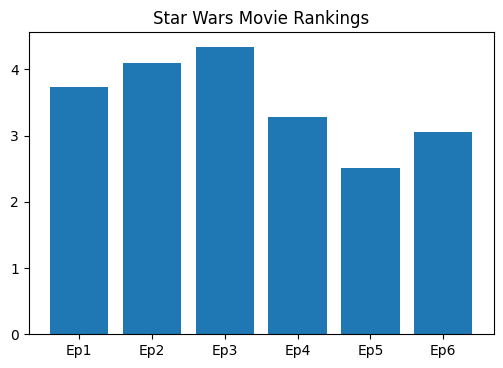

In [22]:
plt.bar(my_xlab, ranking_means)
plt.title("Star Wars Movie Rankings")
plt.show()

Episode has the lowest mean ranking (2.5). A lower score is more favorable because it indicates that more people ranked the movie as their first, second, or third favorite. Episodes 6 and 5 follow with the most favorable ratings. Episodes 1, 2, and 3 have progressively higher ratings, so Episode 3 is the most common least favorite film. 

## Finding the most-viewed movie

Above, we edited the columns indicating which films respondents had seen. Because they are populated with Boolean values, we can sum the columns to get the total number of people who saw each movie. 

In [23]:
most_viewed = star_wars.iloc[:, 3:9].sum()
most_viewed

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

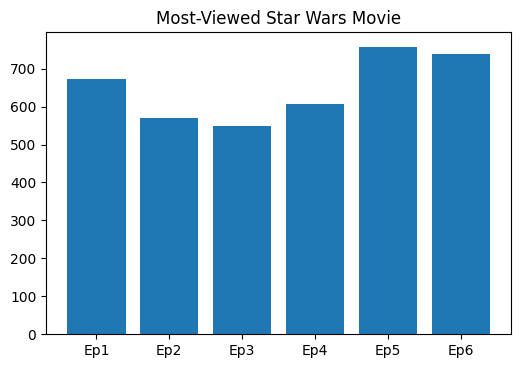

In [24]:
plt.bar(my_xlab, most_viewed)
plt.title("Most-Viewed Star Wars Movie")
plt.show()

In descending order, the most viewed movies were episodes 5, 6, 1, 4, 2, and 3. This aligns pretty closely with people's movie rankings above. This makes sense if people have only seen a few movies, they rated those as their favorites, and left the others blank. 

## Exploring the data by binary segments

Let's repeat the most-viewed and highest rank movies plots again after splitting the data. We will use the column `Do you consider yourself to be a fan of the Star Trek franchise?` to look at the responses of Star Trek fans vs. non-Star Trek fans.

Separating the Star Wars fans:

In [25]:
sw_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
sw_nonfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

Separating the Star Trek fans:

In [26]:
st_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
st_nonfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

Are there more _Star Trek_ fans or non-_Star Trek_ fans?

In [27]:
print(len(st_fans.index))
print(len(st_nonfans.index))

427
641


In [28]:
(641-427)/641

0.3338533541341654

There are 33% more non-_Star Trek_ fans in the survey. 

## Highest-ranked among _Star Trek_ fans

In [29]:
ranking_means_st_fans = st_fans.iloc[:, 9:15].mean()
print(ranking_means_st_fans)
ranking_means_st_nonfans = st_nonfans.iloc[:, 9:15].mean()
ranking_means_st_nonfans

ranking_ep1    3.968675
ranking_ep2    4.255422
ranking_ep3    4.403382
ranking_ep4    3.110843
ranking_ep5    2.407229
ranking_ep6    2.850602
dtype: float64


ranking_ep1    3.487864
ranking_ep2    3.915254
ranking_ep3    4.278450
ranking_ep4    3.433414
ranking_ep5    2.634383
ranking_ep6    3.244552
dtype: float64

In [30]:
x_pos = [1,2,3,4,5,6]
x_pos1 = [x-0.2 for x in x_pos]
x_pos2 = [x+0.2 for x in x_pos]

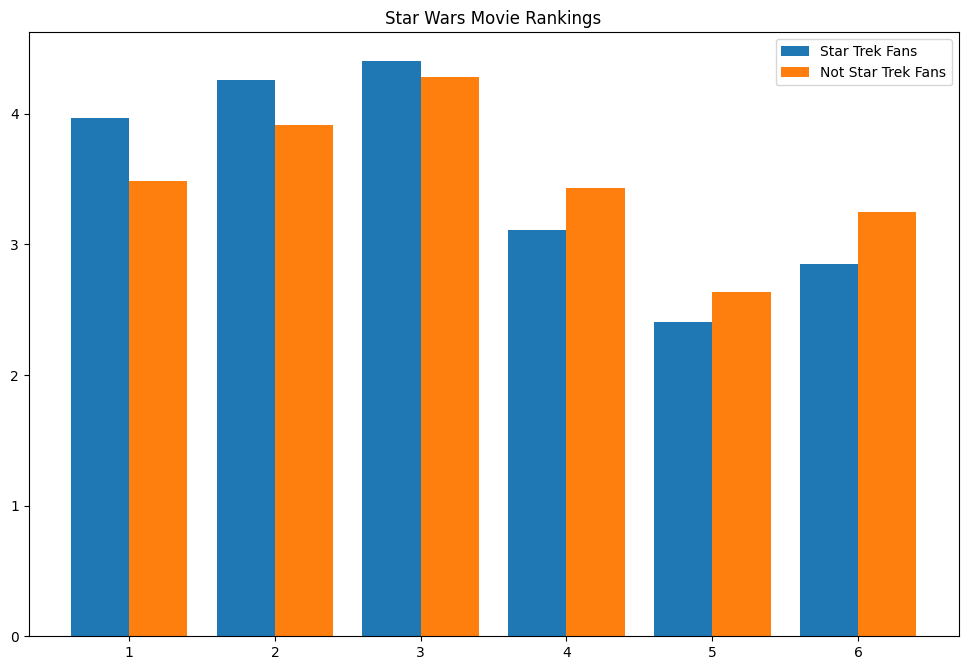

In [31]:
fig = plt.subplots(figsize =(12, 8))
plt.bar(x_pos1, ranking_means_st_fans, width=0.4)
plt.bar(x_pos2, ranking_means_st_nonfans, width=0.4)
plt.title("Star Wars Movie Rankings")
plt.legend(['Star Trek Fans', 'Not Star Trek Fans'])
plt.show()

Remember that a higher mean indicates a lower-ranked movie. The overall order of favorite movies is the same for _Star Trek_ fans, non-_Star Trek_ fans, and all respondents together.  However, _Star Trek_ fans prefer the original trilogy (Episodes 4-6) even more, and rank the prequel trilogy (Episodes 1-3) even lower. It's possible that _Star Trek_ fans may skew a bit older, since many started with the original series in the 60s. Older fans may prefer the original _Star Wars_ trilogy that came out when they were younger and may view it with nostalgia. 

# Most-viewed among _Star Trek_ fans

In [32]:
most_viewed_st = st_fans.iloc[:, 3:9].sum()
print(most_viewed_st)
most_viewed_nonst = st_nonfans.iloc[:, 3:9].sum()
most_viewed_nonst

seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64


seen_1    301
seen_2    228
seen_3    221
seen_4    258
seen_5    353
seen_6    334
dtype: int64

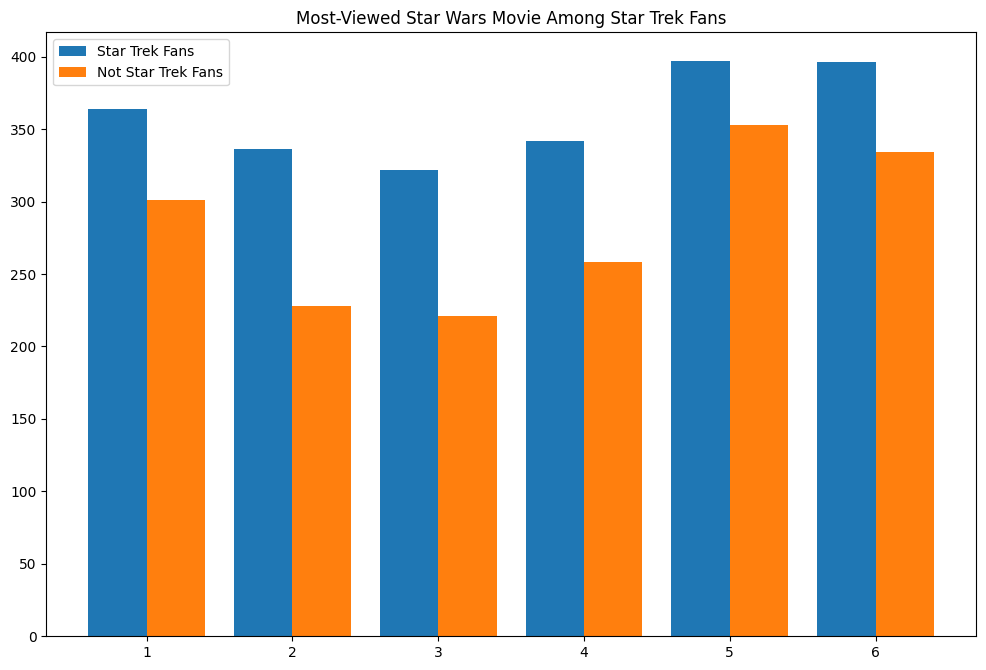

In [33]:
fig = plt.subplots(figsize =(12, 8))
plt.bar(x_pos1, most_viewed_st, width=0.4)
plt.bar(x_pos2, most_viewed_nonst, width=0.4)
plt.title("Most-Viewed Star Wars Movie Among Star Trek Fans")
plt.legend(['Star Trek Fans', 'Not Star Trek Fans'])
plt.show()

_Star Trek_ fans and non-_Star Trek_ fans follow the general pattern of which movies they have seen. However, more _Star Trek_ fans have seen all the films, and many more have seen Episodes 2-4. This is not because of the number of respondants (there were over 200 more non-_Star Trek_ fans in the respondents than _Star Trek_ fans). 

How many people are fans of both franchises?

In [38]:
st_sw_fans = st_fans[st_fans['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
print(len(st_sw_fans.index))
print(len(star_wars.index))

370
1186


More than 86% of repondents who were _Star Trek_ fans are also _Star Wars_ fans. These fans of both franchises make up 31% of the respondents.  